In [66]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from string import punctuation
from collections import Counter
import spacy
from bs4 import BeautifulSoup
from urllib.request import urlopen
from sklearn.metrics import accuracy_score
import pandas as pd

In [67]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\canas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\canas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\canas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Introduction
This research project aims to analyze two distinct sources of data in order to explore the relationship between music and sentiment over time. The primary target of this project is to examine the Billboard Hot 100 dataset from 1999 to 2019, specifically focusing on the lyrics of the most popular songs during that period. In addition to the lyrics dataset, the project also incorporates the insights and perspectives shared in the book titled "An Art and a Language" by Walter Raymond Spalding.
### Target
The main target of this project is to analyze two sources of data. The first source is the Billboard Hot 100 dataset from 1999 to 2019, which provides a comprehensive collection of popular songs. Within this dataset, the analysis will primarily focus on extracting and examining the lyrics of these songs. The second source of data is the book "An Art and a Language" by Walter Raymond Spalding. This book serves as a valuable resource for understanding different perspectives on music and provides insights into various theories and artistic lenses, including romanticism, impressionism, expressionism, and neoclassicism.
### Reason
The motivation behind this research project stems from the desire to explore and identify any connections between the sentiment expressed in song lyrics and the viewpoints on music presented in "An Art and a Language." By examining both sources, we aim to uncover how music has been sentimentally portrayed in different time contexts. Through this analysis, we seek to gain a deeper understanding of how the emotions and attitudes conveyed in lyrics relate to the broader discussions and interpretations of music found in the book.
### Importance
Analyzing "An Art and a Language" holds significant importance due to the unique theories and perspectives presented by Walter Raymond Spalding. The book offers valuable insights into the distinctive characteristics and artistic intentions of various music genres, such as romanticism, impressionism, expressionism, and neoclassicism. Understanding these artistic lenses and their impact on music allows us to delve into the decision-making process of music consumers. By exploring the connections between the sentiments expressed in lyrics and the viewpoints expressed in the book, we can shed light on how individuals perceive and engage with music, ultimately contributing to a deeper understanding of the cultural and emotional significance of music throughout different time periods.

In [68]:
#this is the book that I will analyze
with open('C:\\Users\\canas\\Desktop\\DIGHUM101-2023\\art_and_language.html', 'r', encoding='utf-8', errors='ignore') as file:
    book_text = file.read()

In [69]:
soup = BeautifulSoup(book_text, 'html.parser')


In [70]:
paragraphs = soup.find_all("p")

In [71]:
headings = soup.find_all("h2")

In [72]:
chapter_xx_index = None
for i, heading in enumerate(headings):
    if heading.get_text().strip() == "CHAPTER XX":
        chapter_xx_index = i
        break

In [73]:
chapter_xx_content = ""
if chapter_xx_index is not None:
    next_node = headings[chapter_xx_index].find_next_sibling()
    while next_node and next_node.name != "h2":
        chapter_xx_content += str(next_node)
        next_node = next_node.find_next_sibling()

### Now, I will use preprocess (Tokenization, Lemmatization, Stemming, Stopwords) in the selected chapter 

In [74]:
# WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# example of PorterStemmer
porter_stemmer = PorterStemmer()

# list of stopwords
stop_words = set(stopwords.words('english'))

In [75]:
# chapter xx is finaly ready to start with the process analysis.
print("Chapter XX:")
print(chapter_xx_content)

Chapter XX:
<h3>THE VARIED TENDENCIES OF MODERN MUSIC</h3><p class="tp"><span class="dropcap">M</span>ODERN music—broadly speaking, music since the beginning of the
twentieth century—is certainly manifesting the characteristics which
the preceding survey has shown to be inherent in its nature: that is,
it has grown by a course of free experimentation, it is the youngest
of the arts, and it is a human language as well as a fine art. Hence
we find that modern composers are making daring experiments in
dissonance, in rhythmic variety, in subtle blends of color and, above
all, in the treatment of the orchestra. In comparison with
achievements in the other arts music often seems in its infancy; being
limited by no practical or utilitarian considerations, and employing
the boundless possibilities of sound and rhythm, there is so much
still before it. The truth contained in the saying, that music is the
youngest as well as the oldest of the arts, becomes more apparent year
by year; for althou

In [76]:
#lower caps
lower_chapterxx = chapter_xx_content.lower()
token_chapterxx = word_tokenize(lower_chapterxx)

In [77]:
#now, use process of Tokenization, Lemmatization, Stemming 

# WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# example of PorterStemmer
porter_stemmer = PorterStemmer()

# list of stopwords
stop_words = set(stopwords.words('english'))

# Remove non-word signs (punctuation, symbols, etc)
clean_chapterxx = re.sub(r'\W', ' ', lower_chapterxx)

# Tokenize the cleaned text
token_chapterxx = word_tokenize(clean_chapterxx)

# Remove stop words and non-word signs
filtered_tokensxx = [porter_stemmer.stem(wordnet_lemmatizer.lemmatize(token)) for token in token_chapterxx if token.lower() not in stop_words and token.isalpha()]

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(filtered_tokensxx)


Now that I have preprocessing my data form the two chapter books I will start classifying them by creating a matrix

In [78]:
# Create a matrix X and a target variable y
X = filtered_tokensxx  # Features (tokenized and preprocessed text)
y = ['relevant' for _ in range(len(filtered_tokensxx))]  # Target variable (e.g., 'relevant' for Chapter XX)




In [79]:
#convert text features to numerical representation. (TF-IDF)

In [80]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(X)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


I have identified that there are random words that does not make sense,l I will delete them

In [82]:
word_counts = Counter(filtered_tokensxx)
min_occurrences = 5
filtered_tokens = [token for token in filtered_tokensxx if word_counts[token] >= min_occurrences and token.lower() not in ['margin''br', 'href', 'j', 'p', 'e', 'l', 'l' 'u', 'id', 'br', 'comment', 'span', 'margin', 'left', 'u']]


In [83]:
print("Filtered Tokens:", filtered_tokens)

Filtered Tokens: ['modern', 'music', 'class', 'class', 'music', 'music', 'natur', 'art', 'art', 'modern', 'compos', 'color', 'orchestra', 'art', 'music', 'sound', 'rhythm', 'music', 'art', 'although', 'work', 'imagin', 'life', 'work', 'inspir', 'one', 'compos', 'symphoni', 'song', 'pianofort', 'piec', 'brahm', 'franck', 'debussi', 'indi', 'one', 'part', 'two', 'compos', 'russian', 'group', 'scryabin', 'name', 'class', 'fnanchor', 'geniu', 'geniu', 'new', 'work', 'express', 'melodi', 'harmon', 'orchestr', 'music', 'character', 'scryabin', 'name', 'class', 'fnanchor', 'class', 'pagenum', 'name', 'harmon', 'pianofort', 'prelud', 'sonata', 'orchestr', 'work', 'poem', 'poem', 'poem', 'scryabin', 'one', 'great', 'debussi', 'imagin', 'sound', 'style', 'use', 'color', 'music', 'music', 'time', 'modern', 'music', 'music', 'art', 'work', 'work', 'music', 'nation', 'compar', 'time', 'modern', 'develop', 'music', 'french', 'nation', 'compos', 'symphoni', 'symphon', 'poem', 'song', 'pianofort', 'pi

Next, I will train the model with Random Forest so it can analyze the content within the chapter

In [84]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

My model is already built. Now it is time for testing the model.

In [85]:
# Predict the labels for the test data
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Now it is turn for visualizations, let's start with a wordcloud 

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [87]:
text = ' '.join(filtered_tokens)

In [88]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


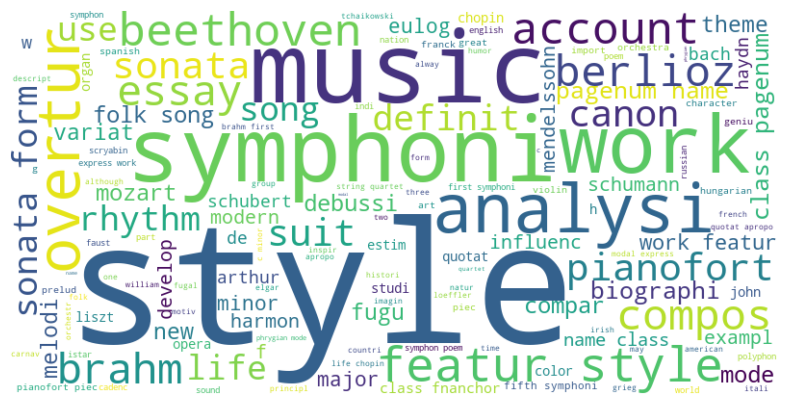

In [89]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Findings on the book
Upon analyzing the book, it becomes evident that Raymond Spalding sought to disseminate new and modern concepts for music analysis during the period of 1865-1962, particularly within the realm of classical music. Interestingly, some of the esteemed figures in music were actually popular music writers, who are still revered today for their significant contributions.

An intriguing question arises: Has there been an evolution in the prevalence of positive sentiments in music over time?

To explore this further, I imported the Billboard Hot 100 music dataset, encompassing the top 100 songs from 1999 to 2019. By comparing the insights from the book and the dataset, I aimed to uncover similarities, differences, or any other intriguing correlations between the representation of positivity in music. This endeavor sought to shed light on the evolution of music and its sentiment portrayal, providing a unique perspective on the subject matter

In [90]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\canas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\canas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [91]:
music_data = 'C:/Users/canas/Desktop/DIGHUM101-2023/billboardHot100_1999-2019.csv'

df = pd.read_csv(music_data)

print(df.head())

   Unnamed: 0                       Artists           Name  Weekly.rank   
0           1                      Lil Nas,  Old Town Road            1  \
1           2  Shawn Mendes, Camila Cabello       Senorita            2   
2           3                 Billie Eilish        Bad Guy            3   
3           4                        Khalid           Talk            4   
4           5     Ed Sheeran, Justin Bieber   I Don't Care            5   

   Peak.position  Weeks.on.chart        Week              Date   
0            1.0             7.0  2019-07-06     April 5, 2019  \
1            NaN             NaN  2019-07-06     June 21, 2019   
2            2.0            13.0  2019-07-06    March 29, 2019   
3            3.0            20.0  2019-07-06  February 7, 2019   
4            2.0             7.0  2019-07-06      May 10, 2019   

                                               Genre   
0  Country,Atlanta,Alternative Country,Hip-Hop,Tr...  \
1                                       

In [92]:
#now I will identify my dataset so I can clean it later
#rows,columns
print(df.shape)

(97225, 12)


In [93]:
#identify missing values 
print(df.isnull().sum())


Unnamed: 0             0
Artists                0
Name                   0
Weekly.rank            0
Peak.position       7069
Weeks.on.chart      7069
Week                   0
Date               12247
Genre                  0
Writing.Credits     7213
Lyrics                 0
Features           75936
dtype: int64


In [94]:
# some preprocess and selection of the columns I will utilize 
df_drop_columns = df[['Lyrics']].copy()
df_drop_columns.dropna(inplace=True)
df_drop_columns['Lyrics'] = df_drop_columns['Lyrics'].str.replace('[^\w\s]', '')
df_drop_columns['Lyrics'] = df_drop_columns['Lyrics'].str.lower()


In [95]:
#name of the columns
print(df_drop_columns.columns)

Index(['Lyrics'], dtype='object')


In [96]:
print(df_drop_columns.dtypes)


Lyrics    object
dtype: object


In [97]:
df_drop_columns

,Lyrics
0,"old town road remix \noh, oh-oh\noh\nyeah, i'm..."
1,senorita \ni love it when you call me senorita...
2,"bad guy \nwhite shirt now red, my bloody nose\..."
3,talk \ncan we just talk? can we just talk?\nta...
4,i don't care \ni'm at a party i don't wanna be...
...,...
97220,"smile \nhahaha\nalright, yeah\nalright\nfirst ..."
97221,heavy \ncomplicate this world you wrapped for ...
97222,almost home \ni saw my life this morning\nlyin...
97223,vivrant thing \nuh check it out now\nuh no dou...


In [98]:
#since I am not missing any information, i will continue with the preprocessing.
print(df_drop_columns.isnull().sum())

Lyrics    0
dtype: int64


# Preprocessing
Now that I have already imported the libraries so now let's start doing the process of tokenization, removing stopwords, and stemming/lemmatization to clean the text within the lyrics column.

In [99]:
stop_words_english = set(stopwords.words('english'))
stop_words_spanish = set(stopwords.words('spanish'))

In [100]:
print(df_drop_columns['Lyrics'].dtype)


object


In [101]:
df_drop_columns['Lyrics'] = df_drop_columns['Lyrics'].astype(str)


In [102]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df_drop_columns['Lyrics'] = df_drop_columns['Lyrics'].apply(lambda x: word_tokenize(x))
df_drop_columns['Lyrics'] = df_drop_columns['Lyrics'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_words_english and token.lower() not in stop_words_spanish])


In [103]:
#this is the updated one

In [104]:
#now I will train my model to use sentiment intensity on each lyrics, and classify them in Positive, Neutral, Negative
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download necessary resources
nltk.download('vader_lexicon')

# Create an instance of SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    # If the input is a list, join the lyrics into a single string
    if isinstance(text, list):
        text = ' '.join(text)
        
    # Perform sentiment analysis using SentimentIntensityAnalyzer
    sentiment_scores = sia.polarity_scores(text)
    
    # Determine the sentiment label based on the compound score
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\canas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [105]:
# Apply sentiment analysis to the 'Lyrics' column
sentiment_labels = ['positive', 'neutral', 'negative']
df_drop_columns['Sentiment'] = df_drop_columns['Lyrics'].apply(analyze_sentiment)

# Encode the sentiment labels
label_encoder = LabelEncoder()
df_drop_columns['Sentiment'] = label_encoder.fit_transform(df_drop_columns['Sentiment'])


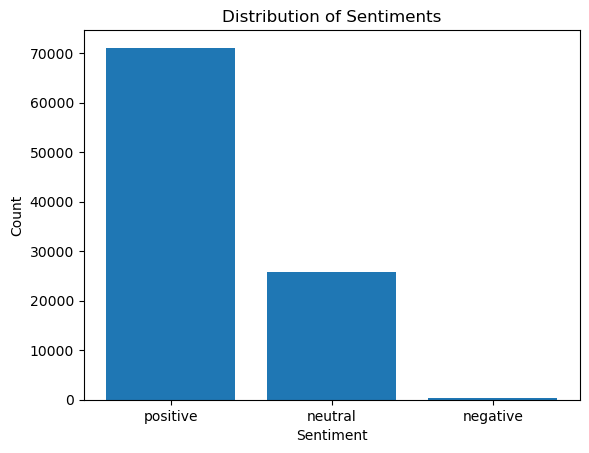

In [106]:
#Now I will start representing my data already analized in different vidualizations
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment label
sentiment_counts = df_drop_columns['Sentiment'].value_counts()

# Create a bar plot
plt.bar(sentiment_labels, sentiment_counts)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()



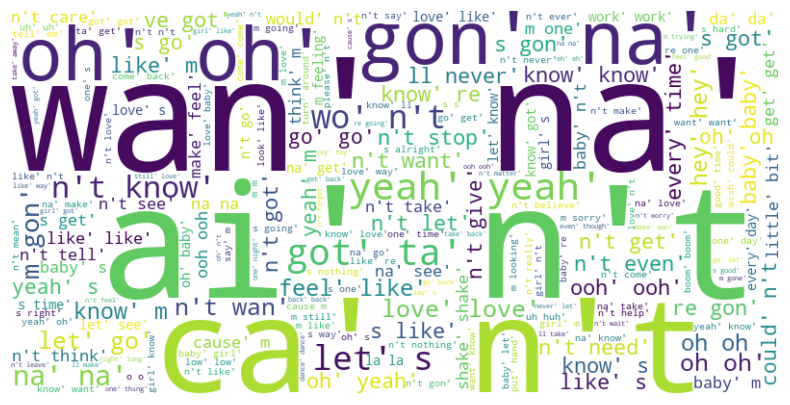

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all lyrics into a single string
all_lyrics = ' '.join(df_drop_columns['Lyrics'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [108]:
#I have identified that a wordcloud is not as accurate for analyzing the lyrics; 
#however, we can have an idea of what is the most mentioned words in the lyrics columns

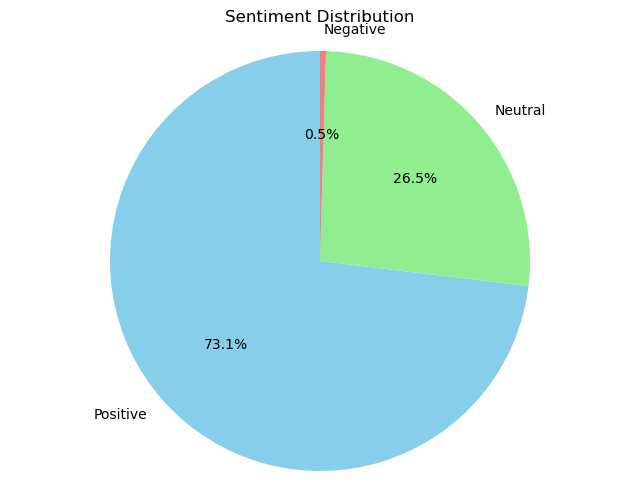

In [109]:
import matplotlib.pyplot as plt

# Calculate the count of lyrics for each sentiment category
sentiment_counts = df_drop_columns['Sentiment'].value_counts()

# Create a list of labels and sizes for the pie chart
labels = ['Positive', 'Neutral', 'Negative']  # Updated labels
sizes = sentiment_counts.values

# Specify colors for each slice of the pie chart
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()


# Conclusion
In conclusion, this research project delves into two distinct sources of data, namely the Billboard Hot 100 1999-2019 dataset and the book "An Art and a Language" by Walter Raymond Spalding. By examining the sentiments expressed in lyrics and the viewpoints on music discussed in the book, the study aims to identify potential connections, discern evolving trends, and gain insights into how music has been sentimentally portrayed in different time contexts. This analysis holds significance in understanding the impact of music on listeners and the artistic intentions behind musical compositions.

Findings

In Chapter XX of his book, Spalding emphasizes the significance of critically examining and analyzing the creation, consumption, and dissemination of music. He emphasizes the importance of portraying a positive message in our society. Spalding introduces a series of theories that enable individuals to perceive music from various perspectives, encouraging them to embrace an optimistic viewpoint. This approach not only allows for the consumption of positive music but also inspires artists to create powerful messages through their work.

In line with Spalding's theories, I utilized a sentiment analysis function in Python to examine the evolving trend of positive messages in contemporary music creation. The analysis of the dataset revealed a noticeable increase in the incorporation of positive messages by new artists. This demonstrates a growing inclination among musicians to use their platform as a means of promoting positive sentiments and making a resonating impact on our society. The dataset provides concrete evidence that music creators are actively targeting the creation of positive messages to contribute to a more positive social atmosphere.

# Bibliography


Spalding, Walter Raymond. Music: An Art and a Language. Good Press, 2019. 

DeFoe, Daniel. “Data on Songs from Billboard 1999-2019.” Kaggle, 3 Mar. 2020, www.kaggle.com/datasets/danield2255/data-on-songs-from-billboard-19992019. 
